In [49]:
# !pip install networkx
# !pip install matplotlib
# !pip install scipy

In [50]:
import networkx as nx
import random
import matplotlib.pyplot as plt
import numpy as np


In [51]:
def create_payoff(R=1, B=0, L=0, N=-4, S=1):
    # trustworthy initiator, trustworthy recipient, untrustworthy initiator, untrustworthy recipient
    payoff_matrix = {
        ("TI", "TR"): (R, R),
        ("TR", "UI"): (-L, R+B),
        ("TI", "UR"): (-N-S, -N),
        ("UI", "UR"): (-N, -N),
    }
    return payoff_matrix

In [52]:
from math import ceil

def create_graph(population_size):
    graph = nx.Graph()
    graph.add_nodes_from(range(population_size))

    # randomly assign strategies to the individuals (even distribution)
    strategies = ["UI"] * (ceil(population_size * 0.05)) + ["TI"] * (ceil(population_size * 0.45)) + ["TR"] * (ceil(population_size * 0.45)) + ["UR"] * (ceil(population_size * 0.05))
    random.shuffle(strategies)

    # assign strategies to the nodes in the graph
    for node, strategy in zip(graph.nodes, strategies):
        graph.nodes[node]["strategy"] = str(strategy)

    # assign initial payoffs 
    for node in graph.nodes:
        graph.nodes[node]["payoff"] = 0

    # add edges between all nodes
    for node1 in graph.nodes:
        for node2 in graph.nodes:
            if node1 != node2:
                graph.add_edge(node1, node2)

    return graph

In [53]:
def display_graph(graph):
    # Create a list of colors corresponding to the strategies
    strategy_colors = {
        "TI": "blue",
        "UI": "orange",
        "TR": "green",
        "UR": "red",
    }
    # node_colors = [strategy_colors[graph.nodes[node]["strategy"]] for node in graph.nodes]

    node_colors = np.array([])
    for node in graph.nodes:
        if graph.nodes[node]["strategy"] == "TI":
            node_colors = np.append(node_colors, "blue")
        elif graph.nodes[node]["strategy"] == "UI":
            node_colors = np.append(node_colors, "orange")
        elif graph.nodes[node]["strategy"] == "TR":
            node_colors = np.append(node_colors, "green")
        elif graph.nodes[node]["strategy"] == "UR":
            node_colors = np.append(node_colors, "red")

    plt.figure(figsize=(8, 6))
    pos = nx.spring_layout(graph, k=0.8)

    # Draw the graph
    nx.draw(graph, pos, node_color=node_colors, with_labels=True, width=0.8, node_size=800)

    # show the legend 
    for strategy in strategy_colors:
        plt.scatter([], [], c=strategy_colors[strategy], label=strategy)
    plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title="Strategies")

    # Show the plot
    # plt.show()


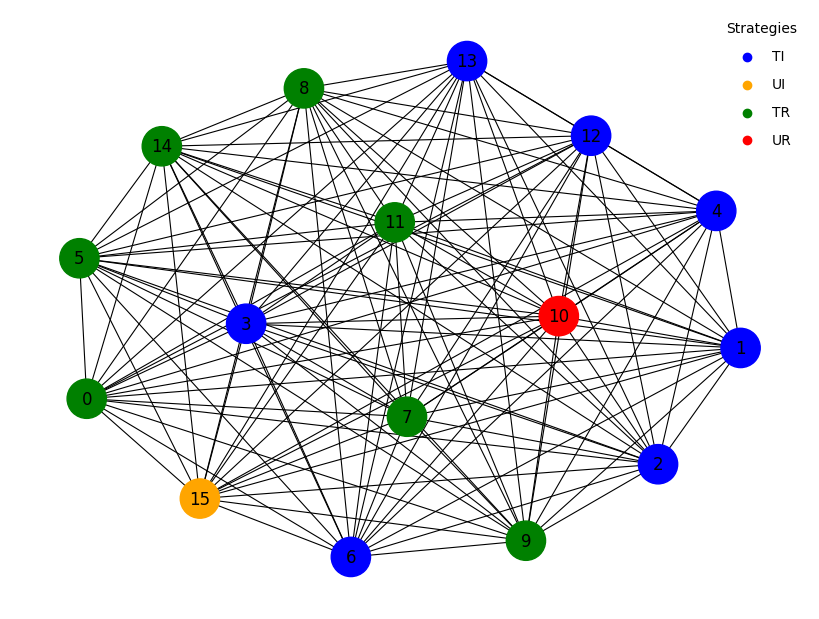

In [54]:
# generate one graph simulation 
payoff_matrix = create_payoff()
graph = create_graph(16)

# display initial graph 
display_graph(graph)


In [55]:
def single_sim(population_size, payoff_matrix, graph):
    """
    Simulate one round of the game.
    """
    # simulate the game dynamics for 10 rounds

    for x in range(10):
        # iterate over edgges in graph & calculate the payoffs for each pairwise interaction based on the strategies in the payoff matrix

        for edge in graph.edges:
            node1, node2 = edge

            # Get the strategies of the interacting nodes
            strategy1 = graph.nodes[node1]["strategy"]
            strategy2 = graph.nodes[node2]["strategy"]

            # sort the strategies alphabetically
            sorted_strategies = sorted([strategy1, strategy2])

            # get the corresponding payoffs from the payoff matrix
            if (sorted_strategies[0], sorted_strategies[1]) not in payoff_matrix:
                continue
            
            payoff1, payoff2 = payoff_matrix[(sorted_strategies[0], sorted_strategies[1])]

            # update the payoffs of the nodes
            graph.nodes[node1]["payoff"] += payoff1
            graph.nodes[node2]["payoff"] += payoff2

        # update the strategies of the nodes based on their payoffs
        total_payoff = sum([graph.nodes[node]["payoff"] for node in graph.nodes])

        if population_size == 0:
            average_payoff = 0
        else:
            average_payoff = total_payoff / population_size

        for node in graph.nodes:
            # get current strategy of the node
            current_strategy = graph.nodes[node]["strategy"]

            # get the payoff of the node
            node_payoff = graph.nodes[node]["payoff"]

            # calculate the fitess of the current strategy
            if average_payoff == 0:
                fitness = 0
            else:
                fitness = node_payoff / average_payoff

            # update strategy based on neighboring nodes 
            new_strategy = current_strategy # initialize with current strategy

            for neighbor in graph.neighbors(node):
                # get payoff of neighbor
                neighbor_payoff = graph.nodes[neighbor]["payoff"]

                # get strategy of neighbor
                neighbor_strategy = graph.nodes[neighbor]["strategy"]

                # get fitness of neighbor
                if average_payoff == 0:
                    neighbor_fitness = 0
                else:
                    neighbor_fitness = neighbor_payoff / average_payoff

                # if TI-UI, change them to whichever payoff is higher
                if current_strategy == "TI" and neighbor_strategy == "UI" or current_strategy == "UI" and neighbor_strategy == "TI":
                    if neighbor_fitness > fitness:
                        new_strategy = neighbor_strategy
                    else: 
                        new_strategy = current_strategy

                # if TR-UR, change them to whichever payoff is higher
                if current_strategy == "TR" and neighbor_strategy == "UR" or current_strategy == "UR" and neighbor_strategy == "TR":
                    if neighbor_fitness > fitness:
                        new_strategy = neighbor_strategy
                    else: 
                        new_strategy = current_strategy
            
            # update the strategy of the node
            graph.nodes[node]["strategy"] = new_strategy

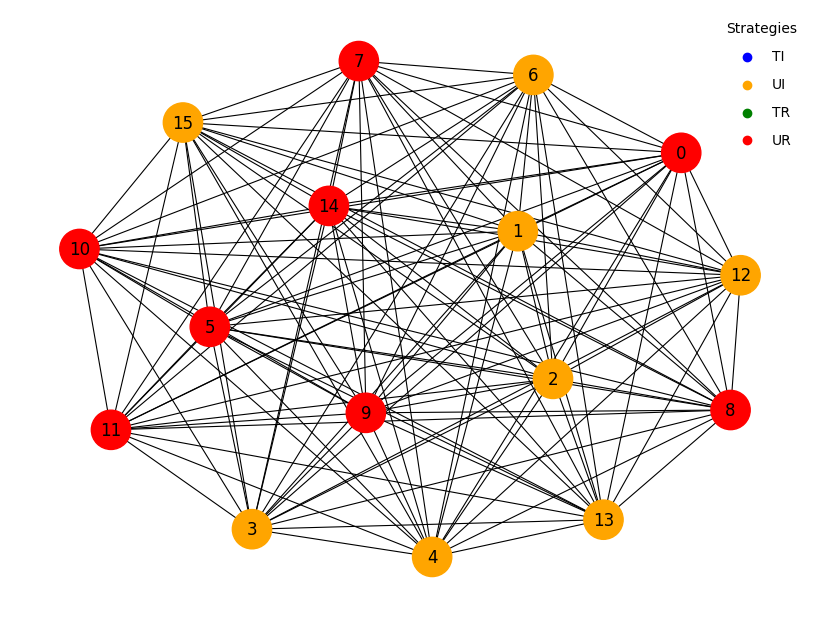

In [56]:
# simulate one round of the game
single_sim(1000, payoff_matrix, graph)

display_graph(graph)

In [57]:
def extract_frequencies(graph):
    """
    Extract the frequencies of each strategy in the graph.
    """
    # initialize frequencies
    frequencies = {
        "TI": 0,
        "UI": 0,
        "TR": 0,
        "UR": 0,
    }

    # iterate over nodes in the graph and update the frequencies
    for node in graph.nodes:
        strategy = graph.nodes[node]["strategy"]
        frequencies[strategy] += 1

    return frequencies

In [58]:
def display_frequencies(frequencies):
    frq = np.array(list(frequencies.values()))

    # create bar plot 
    plt.bar(frequencies.keys(), frq)

    # display values on top of bars
    for i, v in enumerate(frq):
        plt.text(i, v, str(v), ha="center")
    
    # set title and labels
    plt.title("Agents with each strategy")
    plt.xlabel("Strategy")
    plt.ylabel("Number of agents")
    
    # show plot
    plt.show()

{'TI': 0, 'UI': 8, 'TR': 0, 'UR': 8}


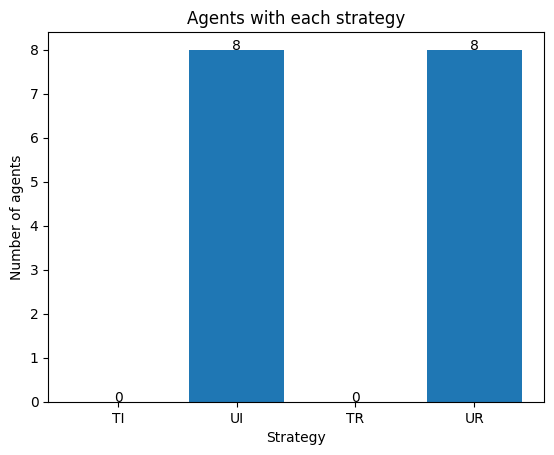

In [59]:
# extract frequencies
frequencies = extract_frequencies(graph)
print(frequencies)

# display frequencies
display_frequencies(frequencies)

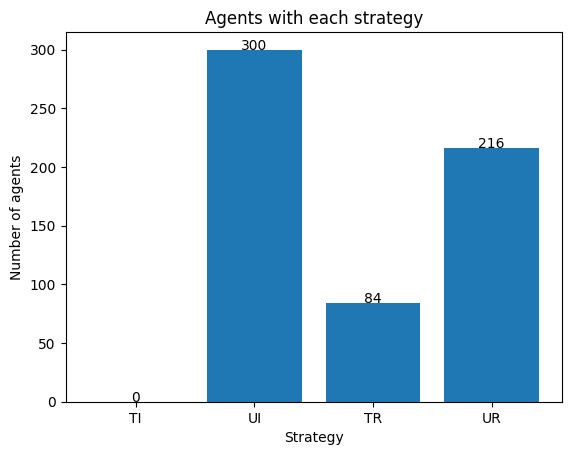

In [60]:
frq = {'TI': 0, 'UI': 300, 'TR': 84, 'UR': 216}
display_frequencies(frq)